# Projeto de Probabilidade - Unidade 2:
por Gildo Augusto, Phelipe Henrique e Wanderson Alves.

## 1 - Introdução

Neste Notebook, mostraremos a influência das faltas no desempenho acadêmico dos alunos, utilizando dados referente ao período dos semestre de 2016.1, 2017.1 e 2017.2 de algumas disciplinas do Bacharelado em Tecnologia da Informação da UFRN (Universidade Federal do Rio Grande do Norte). Para essa representação utilizamos gráficos, através das bibliotecas Seaborn e Matplotlib da linguagem Pyhton 3, que torna possível uma melhor análise.

O Notebook está organizado da maneira a seguir: 
    - Seção 2: detalhes sobre o dataset que contém informações dos discentes;
    - Seção 3: a representação dos gráficos que mostram a média do número de faltas de algumas disciplinas e a situação do aluno em questão (Aprovado, Aprovado por nota, Reprovado e Reprovados por média e por faltas);
    - Seção 4: o gráfico que possui o número médio de faltas dos discentes nas disciplinas mostradas anteriormente
    dos semestres de 2017.2, 2017.1 e 2016.1;
    - Seção 5: a conclusão e apontametos obtidos através do estudo feito.

## 2 - Informações do Dataset
* As informações presentes no dataset foram retiradas do Portal de Dados Abertos da UFRN (http://dados.ufrn.br/dataset/turmas). Nesse portal está presente informações sobre turmas dos cursos de nível médio, técnico, graduação e pós-graduação da UFRN (Universidade Federal do Rio Grande do Norte)

In [12]:
# Célula com todas as bibliotecas necessárias
# importando as bibliotecas necessárias para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [223]:
# Turmas 2017.2
# http://dados.ufrn.br/dataset/turmas

# turmas
turmas_url_2017_2 = 'http://bit.do/turmas_ufrn_2017_2'

# matrículas em componentes em 2017.2
notas_url_2017_2 = 'http://bit.do/notas_ufrn_2017_2'

# turmas 2017.2
turmas_2017_2 = pd.read_csv(turmas_url_2017_2, sep=';')

# matriculas em componentes em 2017.2
notas_2017_2 = pd.read_csv(notas_url_2017_2, sep=';')

# componentes curriculares presenciais
disciplinas_url = 'http://bit.do/componentes_curriculares_ufrn'

# componentes curriculares presenciais
# por alguma razão ou outra, esse dataset tinha algum lixo em linhas que ocasionava 
# erros de leitura, dessa forma foi realizado um filtro apenas por colunas mais importantes
disciplinas = pd.read_csv(disciplinas_url, 
                          sep=';', 
                          usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

In [224]:
# Turmas 2017.1

# turmas
turmas_url_2017_1 = 'http://bit.do/turmas_ufrn_2017_1'

# matrículas em componentes em 2017.1
notas_url_2017_1 = 'http://bit.do/notas_ufrn_2017_1'

# turmas 2017.1
turmas_2017_1 = pd.read_csv(turmas_url_2017_1, sep=';')

# matriculas em componentes em 2017.1
notas_2017_1 = pd.read_csv(notas_url_2017_1, sep=';')

In [225]:
# Turmas 2016.1

# turmas
turmas_url_2016_1 = 'http://bit.do/turmas_ufrn_2016_1'

# matrículas em componentes em 2016.1
notas_url_2016_1 = 'http://bit.do/notas_ufrn_2016_1'

# turmas 2016.1
turmas_2016_1 = pd.read_csv(turmas_url_2016_1, sep=';')

# matriculas em componentes em 2016.1
notas_2016_1 = pd.read_csv(notas_url_2016_1, sep=';')

In [227]:
# Adaptando o dataframe turma e disciplinas para o merge
# Esse procedimento é necessário pois o dataframe turma está codificado com ids

# A coluna id_componente precisa ser a mesma em ambos os dataframes
turmas_2017_2.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2017_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2016_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

# id_componente em ambos os dataframes precisam ser do mesmo tipo
turmas_2017_2.id_componente = turmas_2017_2.id_componente.astype(str)
turmas_2017_1.id_componente = turmas_2017_1.id_componente.astype(str)
turmas_2016_1.id_componente = turmas_2016_1.id_componente.astype(str)

# Limpando o dataframe disciplinas com linhas desnecessárias
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

# Pegando apenas as disciplinas do IMD
disciplinas = disciplinas[disciplinas.unidade_responsavel == 'INSTITUTO METROPOLE DIGITAL']

In [228]:
# Fazendo um merge entre o dataframe turmas e disciplinas utilizando como base a coluna id_componente
# https://pandas.pydata.org/pandas-docs/stable/merging.html
colunas = ["id_turma","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario", "ano", "periodo"]

# Merge os dois dataframes utilizando como base a coluna id_componente.
disciplinas_turma_2017_2 = pd.merge(turmas_2017_2, disciplinas, on='id_componente')[colunas]
disciplinas_turma_2017_1 = pd.merge(turmas_2017_1, disciplinas, on='id_componente')[colunas]
disciplinas_turma_2016_1 = pd.merge(turmas_2016_1, disciplinas, on='id_componente')[colunas]

disciplinas_turma_2017_2.head()

,id_turma,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario,ano,periodo
0,57608376,IMD0017,GRADUAÇÃO,PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,60.0,5N34 (24/07/2017 - 16/12/2017),2017,2
1,57608377,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,65.0,246M3456 (24/07/2017 - 16/12/2017),2017,2
2,57608377,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,65.0,246M3456 (24/07/2017 - 16/12/2017),2017,2
3,57608377,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,65.0,246M3456 (24/07/2017 - 16/12/2017),2017,2
4,57608378,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,67.0,246N1234 (24/07/2017 - 16/12/2017),2017,2


In [34]:
colunas_relevantes = ["id_turma", "codigo", "nome", "descricao_horario", "ano", 
                      "periodo", "media_final", "numero_total_faltas", "descricao", "discente"]
# Merge de turma com as notas dos 3 semestres trabalhados.
notas_turma_turma_2017_2 = pd.merge(disciplinas_turma_2017_2, notas_2017_2, on='id_turma')[colunas_relevantes]
notas_turma_turma_2017_1 = pd.merge(disciplinas_turma_2017_1, notas_2017_1, on='id_turma')[colunas_relevantes]
notas_turma_turma_2016_1 = pd.merge(disciplinas_turma_2016_1, notas_2016_1, on='id_turma')[colunas_relevantes]


In [35]:
%%javascript
// Para evitar dos graficos ficarem contidos numa caixa com scroll.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 3 - Leitura e Plotagem dos Gráficos (2017.2)
Para dar início às análises, utilizamos dados referentes ao semestre de 2017.2 das faltas e descrição dos discentes para verificar se a premissa era viável. Para isso selecionamos 8 disciplinas que consideramos importantes da grade do Bacharelado em Tecnologia da Informação e assim gerar os gráficos, cada um contendo 4 caixas que representaram o estado dos alunos em questão.

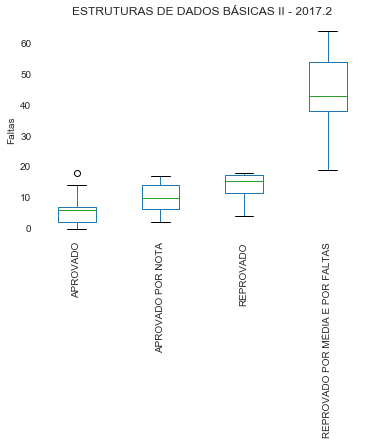

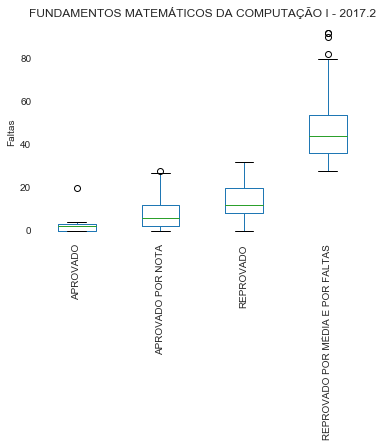

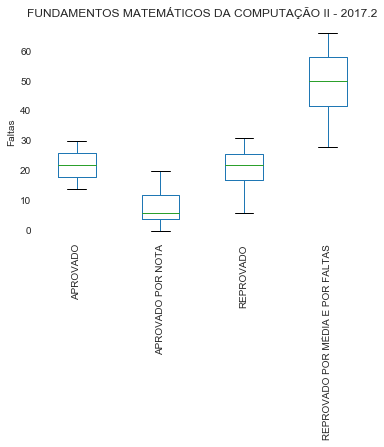

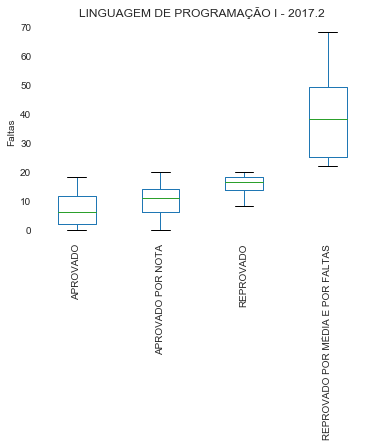

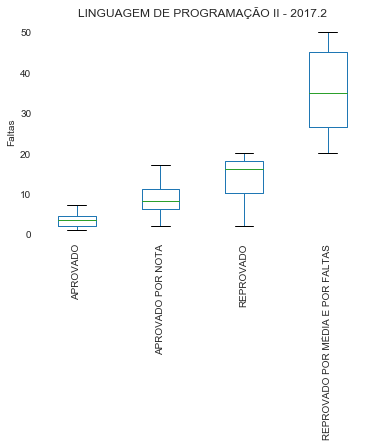

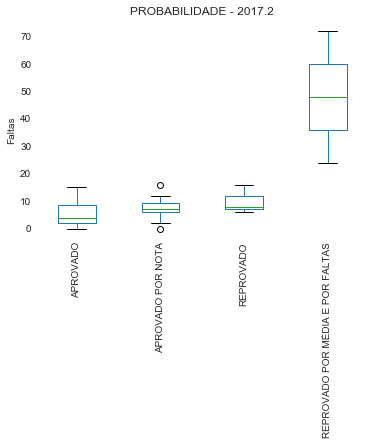

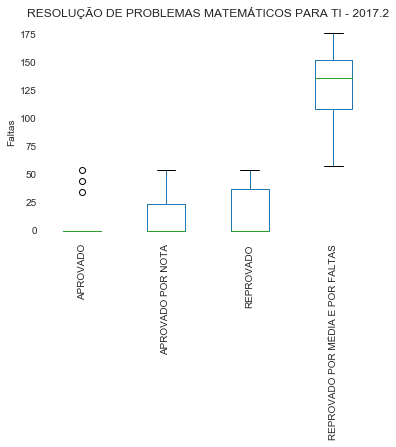

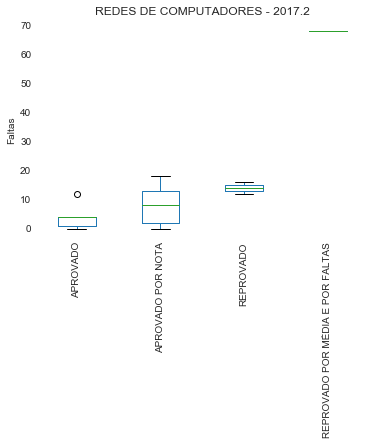

In [109]:
sns.set_style("whitegrid")

disciplinas = (
    'ESTRUTURAS DE DADOS BÁSICAS II',
    'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I',
    'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II',
    'LINGUAGEM DE PROGRAMAÇÃO I',
    'LINGUAGEM DE PROGRAMAÇÃO II',
    'PROBABILIDADE',
    'RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI',
    'REDES DE COMPUTADORES'
)
# Aqui é gerado um dicionário em que a chave é o nome da disciplina e o valor é um dataframe contendo as
# notas para aquela disciplina. Como a disciplina tem mais de uma unidade, a quantidade de faltas aparece em um
# numero igual a quantidade de unidades. Para evitar isso e gerar incosistências na análise foi removido esses
# dados duplicados e deixado apenas um por discente.
dataframes_notas_2017_2 = {}
for disciplina in disciplinas:
    dataframes_notas_2017_2[disciplina] = notas_turma_turma_2017_2[notas_turma_turma_2017_2.nome == disciplina].drop_duplicates('discente')
    
# Aqui percorremos o dataframes_notas_2017_2, montado anteriormente, e criamos o dataframe_grupos, que também tem como 
# chave o nome das disciplinas e um dataframe contendo os grupos de aprovaçoes como colunas.
dataframes_grupos_2017_2 = {}
for (disciplina, dataframe_2017_2) in dataframes_notas_2017_2.items():
    lista_status = list(filter(lambda i : i not in ('INDEFERIDO', 'TRANCADO', 'DESISTENCIA', 'EXCLUIDA', 'REPROVADO POR NOTA', 'CANCELADO'), dataframe_2017_2.descricao.unique()))
    dataframe_montado_2017_2 = {}
    for status in lista_status:
        dataframe_montado_2017_2[status] = dataframe_2017_2[dataframe_2017_2.descricao == status]['numero_total_faltas']
    dataframes_grupos_2017_2[disciplina] = pd.DataFrame.from_dict(dataframe_montado_2017_2)

# Aqui percorremos o dicionário de dataframes e criamos um gráfico para cada um.
for disciplina, dataframe_2017_2 in dataframes_grupos_2017_2.items():
    ax = dataframe_2017_2.plot(kind='box', rot=90, title=disciplina+' - 2017.2')
    ax.set(ylabel='Faltas')
    ax.grid(False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
        
# Concatenação para ser gerado um gráficos para um dataframe com a junção dos dataframes de todas as disciplinas trabalhadas
# do semestre de 2017.2
dataframe_todos_2017_2 = pd.concat(dataframes_grupos_2017_2.values())

Observamos que fica evidente a alta incidência no número de faltas superior dos alunos Reprovados, principalmente em disciplinas como Fundamentos Matemáticos para Computação I e Linguagem de Programação II, onde a mediana excedeu facilmente o terceiro quartil dos Alunos Aprovados por Nota.

## 4 - Análise Geral (2016.1 ,2017.1, 2017.2)
De modo semelhante ao tópico anterior, analisamos as mesmas disciplinas em um período maior, abrangendo os semestres de 2016.1, 2017.1 e 2017.2, para verificar se realmente nosso estudo era condizente com aquilo que queríamos comprovar.

In [39]:
# Aqui é gerado um dicionário em que a chave é o nome da disciplina e o valor é um dataframe contendo as
# notas para aquela disciplina. Como a disciplina tem mais de uma unidade, a quantidade de faltas aparece em um
# numero igual a quantidade de unidades. Para evitar isso e gerar incosistências na análise foi removido esses
# dados duplicados e deixado apenas um por discente.
dataframes_notas_2017_1 = {}
for disciplina in disciplinas:
    dataframes_notas_2017_1[disciplina] = notas_turma_turma_2017_1[notas_turma_turma_2017_1.nome == disciplina].drop_duplicates('discente')

# Aqui percorremos o dataframes_notas_2017_1, montado anteriormente, e criamos o dataframe_grupos, que também tem como 
# chave o nome das disciplinas e um dataframe contendo os grupos de aprovaçoes como colunas.
dataframes_grupos_2017_1 = {}
for (disciplina, dataframe_2017_1) in dataframes_notas_2017_1.items():
    lista_status = list(filter(lambda i : i not in ('INDEFERIDO', 'TRANCADO', 'DESISTENCIA', 'EXCLUIDA', 'REPROVADO POR NOTA', 'CANCELADO'), dataframe_2017_1.descricao.unique()))
    dataframe_montado_2017_1 = {}
    for status in lista_status:
        dataframe_montado_2017_1[status] = dataframe_2017_1[dataframe_2017_1.descricao == status]['numero_total_faltas']
    dataframes_grupos_2017_1[disciplina] = pd.DataFrame.from_dict(dataframe_montado_2017_1)
      
# Concatenação para ser gerado um gráficos para um dataframe com a junção dos dataframes de todas as disciplinas trabalhadas
# do semestre de 2017.1
dataframe_todos_2017_1 = pd.concat(dataframes_grupos_2017_1.values())

In [37]:
# Aqui é gerado um dicionário em que a chave é o nome da disciplina e o valor é um dataframe contendo as
# notas para aquela disciplina. Como a disciplina tem mais de uma unidade, a quantidade de faltas aparece em um
# numero igual a quantidade de unidades. Para evitar isso e gerar incosistências na análise foi removido esses
# dados duplicados e deixado apenas um por discente.
dataframes_notas_2016_1 = {}
for disciplina in disciplinas:
    dataframes_notas_2016_1[disciplina] = notas_turma_turma_2016_1[notas_turma_turma_2016_1.nome == disciplina].drop_duplicates('discente')

# Aqui percorremos o dataframes_notas_2016_1, montado anteriormente, e criamos o dataframe_grupos, que também tem como 
# chave o nome das disciplinas e um dataframe contendo os grupos de aprovaçoes como colunas.
dataframes_grupos_2016_1 = {}
for (disciplina, dataframe_2016_1) in dataframes_notas_2016_1.items():
    lista_status = list(filter(lambda i : i not in ('INDEFERIDO', 'TRANCADO', 'DESISTENCIA', 'EXCLUIDA', 'REPROVADO POR NOTA', 'CANCELADO'), dataframe_2016_1.descricao.unique()))
    dataframe_montado_2016_1 = {}
    for status in lista_status:
        dataframe_montado_2016_1[status] = dataframe_2016_1[dataframe_2016_1.descricao == status]['numero_total_faltas']
    dataframes_grupos_2016_1[disciplina] = pd.DataFrame.from_dict(dataframe_montado_2016_1)
    
# Concatenação para ser gerado um gráficos para um dataframe com a junção dos dataframes de todas as disciplinas trabalhadas
# do semestre de 2016.1
dataframe_todos_2016_1 = pd.concat(dataframes_grupos_2016_1.values())

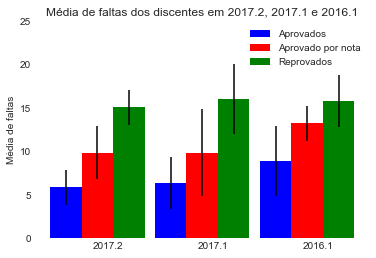

In [219]:
# Aqui é gerado um gráfico de barras contendo a média dos aprovados, aprovados por nota e 
# reprovados dos semestres de 2017.2, 2017.1 e 2016.1
N = 3
ind = np.arange(N)
width = 0.3     

fig, ax = plt.subplots()

mean_aprovados = (dataframe_todos_2017_2['APROVADO'].mean(), dataframe_todos_2017_1['APROVADO'].mean(),
            dataframe_todos_2016_1['APROVADO'].mean())
mean_aprovados_std = (2, 3, 4)
rects1 = ax.bar(ind - width, mean_aprovados, width, color='b', yerr=mean_aprovados_std)

mean_reprovados = (dataframe_todos_2017_2['REPROVADO'].mean(), dataframe_todos_2017_1['REPROVADO'].mean(),
              dataframe_todos_2016_1['REPROVADO'].mean())
mean_reprovados_std = (2, 4, 3)
rects2 = ax.bar(ind + width, mean_reprovados, width, color='g', yerr=mean_reprovados_std)

mean_aprovados_nota = (dataframe_todos_2017_2['APROVADO POR NOTA'].mean(), dataframe_todos_2017_1['APROVADO POR NOTA'].mean(),
              dataframe_todos_2016_1['APROVADO POR NOTA'].mean())
mean_aprovados_nota_std = (3, 5, 2)
rects3 = ax.bar(ind, mean_aprovados_nota, width, color='r', yerr=mean_aprovados_nota_std)

# Ajustando os labels, os títulos, colocando os limites, ajustandos os ticks e etc
ax.set_ylabel('Média de faltas')
ax.set_title('Média de faltas dos discentes em 2017.2, 2017.1 e 2016.1')
ax.set_ylim(0, 25)
ax.set_xticks(ind + width/3)
ax.set_xticklabels(('2017.2', '2017.1', '2016.1'))
ax.grid('False')
for key, spine in ax.spines.items():
        spine.set_visible(False)
ax.legend((rects1[0], rects3[0], rects2[0],), ('Aprovados', 'Aprovado por nota', 'Reprovados'))

plt.show()

Através do Gráfico de barras fica visivelmente claro, podemos observar um padrão na média de faltas com relação a situação dos alunos, seja de maneira singular nos gráficos de cada disciplina como também para uma análise mais abrangente dos últimos três semestres.

## 5 - Conclusão
Como pode ser observado neste notebook, o índice de faltas dos alunos pode e é um fator agravante na reprovação dos alunos em vários componentes curriculares. O que é preocupante, já que isso também pode representar um índice elevado de desistência por parte dos discentes. Uma solução para isso seria fazer um acompanhamento das notas desses alunos que possuem um número elevado de faltas, questionar se ele tem interesse pela disciplina e/ou possui facilidade em aprende-la, caso contrário, saber o motivo pelo qual o próprio não tem motivação para acompanhar as aulas. Da mesma forma, repensar o porque algumas dessas disciplinas tem apresentado continuamente o mesmo histórico alarmante quando se fala nesse assunto.